In [ ]:
pip install scikit-plot

In [2]:
# the usual
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import numpy.linalg as la
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import KFold
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import math
import numpy as np
import pandas as pd

import scikitplot
import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.utils import np_utils
%pylab inline
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)


Populating the interactive namespace from numpy and matplotlib
Mounted at /content/drive/


In [3]:
cd "./drive/My Drive/CSC420_Project"

/content/drive/My Drive/CSC420_Project


In [4]:
df = pd.read_csv('./bigger_data/data/500_picts_satz.csv')
og_500_path = './bigger_data/og_500/'
edge_500_path = './bigger_data/edge_500/'
gradient_500_path = './bigger_data/gradient_500/'

print(df.shape)
df.head()

(500, 3)


,id,image,emotion
0,906,Sourav_Ganguly_0003.jpg,fear
1,906,Sourav_Ganguly_0004.jpg,happiness
2,906,Sourav_Ganguly_0005.jpg,neutral
3,906,Spencer_Abraham_0001.jpg,anger
4,906,Spencer_Abraham_0003.jpg,anger


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


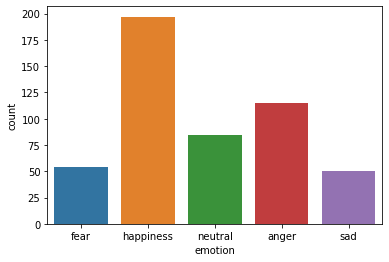

In [5]:
sns.countplot(df.emotion)
pyplot.show()

In [7]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 3s 0us/step


In [8]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)
for layer in model.layers:
    layer.trainable = False
model.add(Dense(units=3, activation='softmax'))
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [10]:
train_path = './bigger_data/train_og_500/'
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['happiness', 'neutral', 'anger'], batch_size=10)
valid_path = './bigger_data/valid_og_500/'
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['happiness', 'neutral', 'anger'], batch_size=10)


Found 356 images belonging to 3 classes.
Found 40 images belonging to 3 classes.


In [ ]:
# history = model.fit(x=train_batches,
#           steps_per_epoch=len(train_batches),
#           validation_data=valid_batches,
#           validation_steps=len(valid_batches),
#           epochs=5,
#           verbose=2
# )

In [11]:
history = model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=10 ,
          verbose=2
)

Epoch 1/10
36/36 - 68s - loss: 1.2372 - accuracy: 0.3820 - val_loss: 1.1454 - val_accuracy: 0.4500
Epoch 2/10
36/36 - 2s - loss: 1.1100 - accuracy: 0.4410 - val_loss: 1.0896 - val_accuracy: 0.4500
Epoch 3/10
36/36 - 2s - loss: 1.0235 - accuracy: 0.5225 - val_loss: 1.0243 - val_accuracy: 0.5000
Epoch 4/10
36/36 - 2s - loss: 0.9578 - accuracy: 0.5365 - val_loss: 0.9675 - val_accuracy: 0.5250
Epoch 5/10
36/36 - 2s - loss: 0.9060 - accuracy: 0.6039 - val_loss: 0.9372 - val_accuracy: 0.5500
Epoch 6/10
36/36 - 2s - loss: 0.8697 - accuracy: 0.6039 - val_loss: 0.9124 - val_accuracy: 0.6000
Epoch 7/10
36/36 - 2s - loss: 0.8268 - accuracy: 0.6545 - val_loss: 0.9030 - val_accuracy: 0.5500
Epoch 8/10
36/36 - 2s - loss: 0.8006 - accuracy: 0.6713 - val_loss: 0.8959 - val_accuracy: 0.5500
Epoch 9/10
36/36 - 2s - loss: 0.7754 - accuracy: 0.6910 - val_loss: 0.8972 - val_accuracy: 0.5500
Epoch 10/10
36/36 - 2s - loss: 0.7509 - accuracy: 0.7079 - val_loss: 0.8829 - val_accuracy: 0.6000


In [13]:
valid_batches

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

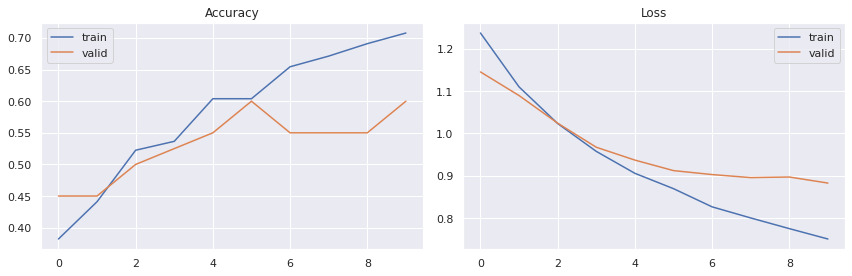

In [12]:
sns.set()
fig = pyplot.figure(0, (12, 4))

ax = pyplot.subplot(1, 2, 1)
sns.lineplot(history.epoch, history.history['accuracy'], label='train')
sns.lineplot(history.epoch, history.history['val_accuracy'], label='valid')
pyplot.title('Accuracy')
pyplot.tight_layout()

ax = pyplot.subplot(1, 2, 2)
sns.lineplot(history.epoch, history.history['loss'], label='train')
sns.lineplot(history.epoch, history.history['val_loss'], label='valid')
pyplot.title('Loss')
pyplot.tight_layout()

pyplot.savefig('epoch_history_dcnn.png')
pyplot.show()

In [16]:
result = model.predict(valid_batches)
result

array([[0.5086614 , 0.34869292, 0.14264569],
       [0.6385316 , 0.28790298, 0.07356542],
       [0.891588  , 0.07329533, 0.03511663],
       [0.8994322 , 0.04413281, 0.05643511],
       [0.50499517, 0.10732113, 0.3876837 ],
       [0.6718471 , 0.10601515, 0.22213778],
       [0.55278146, 0.24389854, 0.20332003],
       [0.3795788 , 0.14879766, 0.4716235 ],
       [0.37737644, 0.08314613, 0.53947747],
       [0.45474902, 0.19687319, 0.34837776],
       [0.5748978 , 0.12284886, 0.3022533 ],
       [0.38622624, 0.34794033, 0.2658335 ],
       [0.5541225 , 0.16553399, 0.2803435 ],
       [0.6411803 , 0.07481303, 0.28400674],
       [0.33955944, 0.14725265, 0.5131879 ],
       [0.4285111 , 0.27410606, 0.2973828 ],
       [0.6680621 , 0.15717676, 0.17476113],
       [0.24298154, 0.25592768, 0.5010908 ],
       [0.7833225 , 0.08043951, 0.13623798],
       [0.11122299, 0.09591524, 0.7928618 ],
       [0.85724133, 0.05108221, 0.09167646],
       [0.06020533, 0.18852587, 0.75126886],
       [0.

In [17]:
valid_batches.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [21]:
count = 0
for i in range(len(result)):
    if np.argmax(result[i]) == valid_batches.labels[i]:
        count += 1
print(count/len(result))

0.475
